In [1]:
import os
print(os.getcwd())

d:\MLOps\customer-churn\experiments


In [2]:
os.chdir("../")
print(os.getcwd())

d:\MLOps\customer-churn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("artifacts\dataset.csv")

In [5]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [6]:
numerical_columns=df.select_dtypes(exclude='object').columns
categorical_columns=df.select_dtypes(include='object').columns

In [7]:
df['CustomerID'].nunique()

440832

In [8]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

## Bivariate Analysis

### Numerical - Categorical 

### Age- Churn Bivariate Analysis

In [15]:
pd.crosstab(df['Churn'],df['Gender'],normalize="columns")*100

Gender,Female,Male
Churn,,
0.0,33.330885,50.87312
1.0,66.669115,49.12688


In [16]:
pd.crosstab(df['Churn'],df['Subscription Type'],normalize="columns")*100

Subscription Type,Basic,Premium,Standard
Churn,,,
0.0,41.821767,44.0583,43.930047
1.0,58.178233,55.9417,56.069953


In [17]:
pd.crosstab(df['Churn'],df['Contract Length'],normalize="columns")*100

Contract Length,Annual,Monthly,Quarterly
Churn,,,
0.0,53.923859,0.0,53.974395
1.0,46.076141,100.0,46.025605


<Axes: xlabel='Contract Length', ylabel='Churn'>

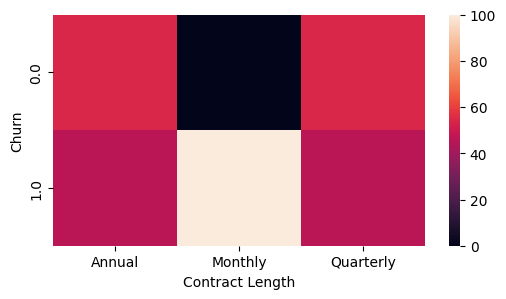

In [21]:
plt.figure(figsize=(6,3))
sns.heatmap(pd.crosstab(df['Churn'],df['Contract Length'],normalize="columns")*100)

In [11]:
categorical_columns

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

### Numerical- Categorical

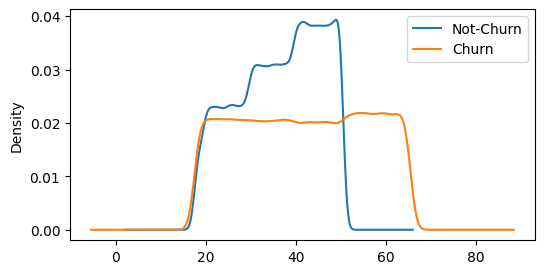

In [22]:
plt.figure(figsize=(6,3))
df[df['Churn']==0]['Age'].plot(kind="kde",label="Not-Churn")
df[df['Churn']==1]['Age'].plot(kind="kde",label="Churn")
plt.legend()
plt.show()

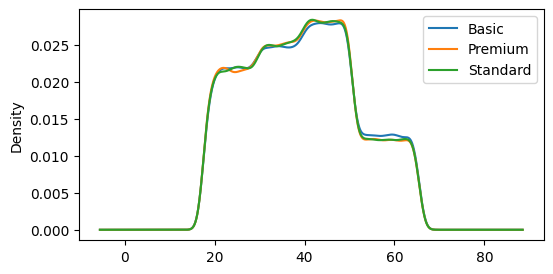

In [24]:
plt.figure(figsize=(6,3))
df[df['Subscription Type']=="Basic"]['Age'].plot(kind="kde",label="Basic")
df[df['Subscription Type']=="Premium"]['Age'].plot(kind="kde",label="Premium")
df[df['Subscription Type']=="Standard"]['Age'].plot(kind="kde",label="Standard")
plt.legend()
plt.show()

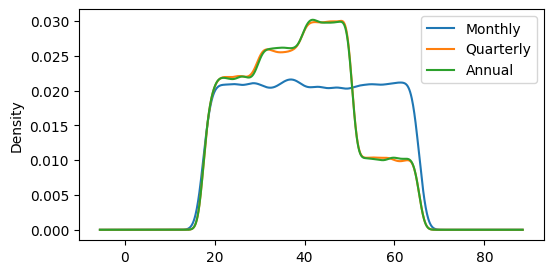

In [25]:
plt.figure(figsize=(6,3))
df[df['Contract Length']=="Monthly"]['Age'].plot(kind="kde",label="Monthly")
df[df['Contract Length']=="Quarterly"]['Age'].plot(kind="kde",label="Quarterly")
df[df['Contract Length']=="Annual"]['Age'].plot(kind="kde",label="Annual")
plt.legend()
plt.show()

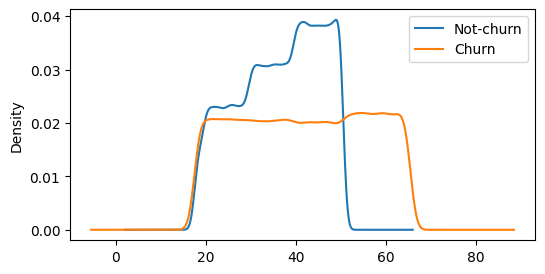

In [26]:
plt.figure(figsize=(6,3))
df[df['Churn']==0]['Age'].plot(kind="kde",label="Not-churn")
df[df['Churn']==1]['Age'].plot(kind="kde",label="Churn")
plt.legend()
plt.show()

<strong>Conclusion:</strong>
We can clearly say that users having age 20 to 60 has Monthly subscription plan and they are Churners

### numerical-numerical

In [27]:
numerical_columns

Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

<Axes: xlabel='Last Interaction', ylabel='Payment Delay'>

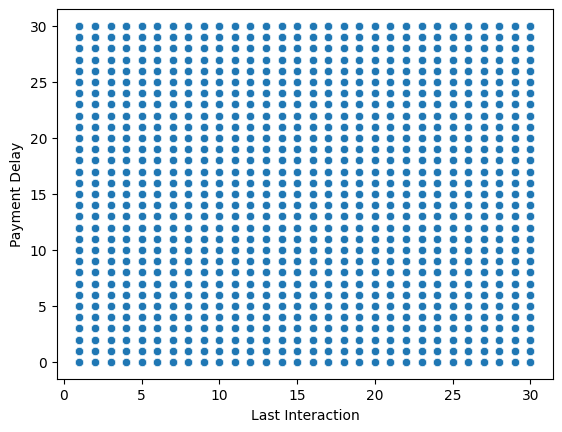

In [36]:
sns.scatterplot(x=df['Last Interaction'],y=df['Payment Delay'])

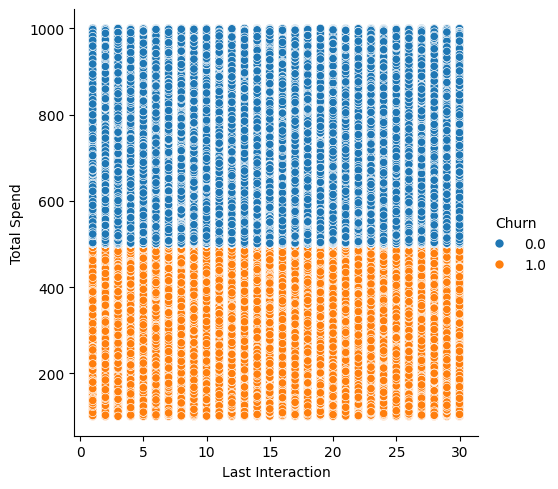

In [44]:
sns.relplot(x="Last Interaction", y="Total Spend",hue="Churn" , data=df)

<strong>Conclusion</strong> We can say that users those spend less than 500 they are churners. maybe there Contract type is monthly or subscription type is basic

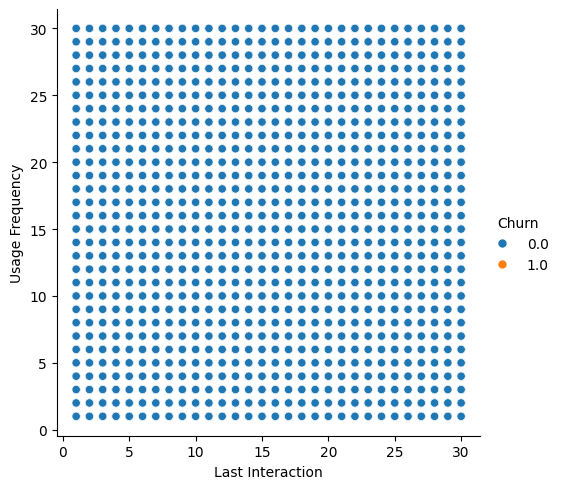

In [45]:
sns.relplot(x="Last Interaction", y="Usage Frequency",hue="Churn" , data=df)